<a href="https://colab.research.google.com/github/RomuloPrestes/Llrm-Ltda/blob/main/04_Segmenta%C3%A7%C3%A3o_de_imagens_saudavel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importação das bibliotecas

In [5]:
import cv2 #OpenCV
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

In [6]:
#entrada da imagem
image = cv2.imread("/content/drive/MyDrive/Bio System Ltda/Banco de dados/imagem editada/Saudavel 01.png")

In [7]:
#convertendo Rgb
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [8]:
# transformando a image em uma matriz 2d
pixel_values = image.reshape((-1, 3))
# converção to float
pixel_values = np.float32(pixel_values)

In [9]:
print(pixel_values.shape)

(184320, 3)


In [10]:
#definição de criterios de parada
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)


In [11]:
#selecionar o numero de kluster K para o numero de cores da imagem
k = 2
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [12]:
#conversão de valores para 8bits
centers = np.uint8(centers)
#nivelamento da matriz
labels = labels.flatten()


In [13]:
#conversção de cores para a segmentação
segmented_image = centers[labels.flatten()]


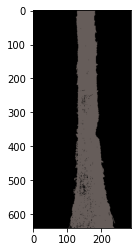

In [14]:
#retornar o valor da imagem
segmented_image = segmented_image.reshape(image.shape)
#printar imagem
plt.imshow(segmented_image)
plt.show()

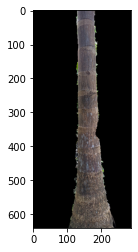

In [15]:
#desabilitar o cluster 2 para a imagem retornar preto
masked_image = np.copy(image)
#conversão de valores para a coversão em pixel
masked_image = masked_image.reshape((-1, 3))
#desativar cluster
cluster = 2
masked_image[labels == cluster] = [0, 0, 0]
#converção para a forma original
masked_image = masked_image.reshape(image.shape)
#mostrar imagem
plt.imshow(masked_image)
plt.show()